## Import libraries

Libraries needed for this exercice.

In [ ]:
import numpy as np

import pandas as pd

from pandas import read_csv

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

from sklearn.datasets import fetch_california_housing

import matplotlib.pyplot as plt
%matplotlib inline

# 1. Load the dataset



In [ ]:
#Get dataset
housing = fetch_california_housing(as_frame=True)

In [ ]:
# a)

print('data dimensions: ', housing['frame'].shape)

# Show first examples
housing['frame'].head()


data dimensions:  (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Print names of features and target
print('Features:', housing.feature_names)

print('Target:', housing.target_names)

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: ['MedHouseVal']


In [ ]:
# b) check missing values
housing['frame'].isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## 2. Data exploration



In [ ]:
# Get data
X = housing.data.to_numpy()   # Features
y = housing.target.to_numpy() # Target

# a) X and y dimensions
print("Features: ",X.shape,"Target:",y.shape)

Features:  (20640, 8) Target: (20640,)


data features


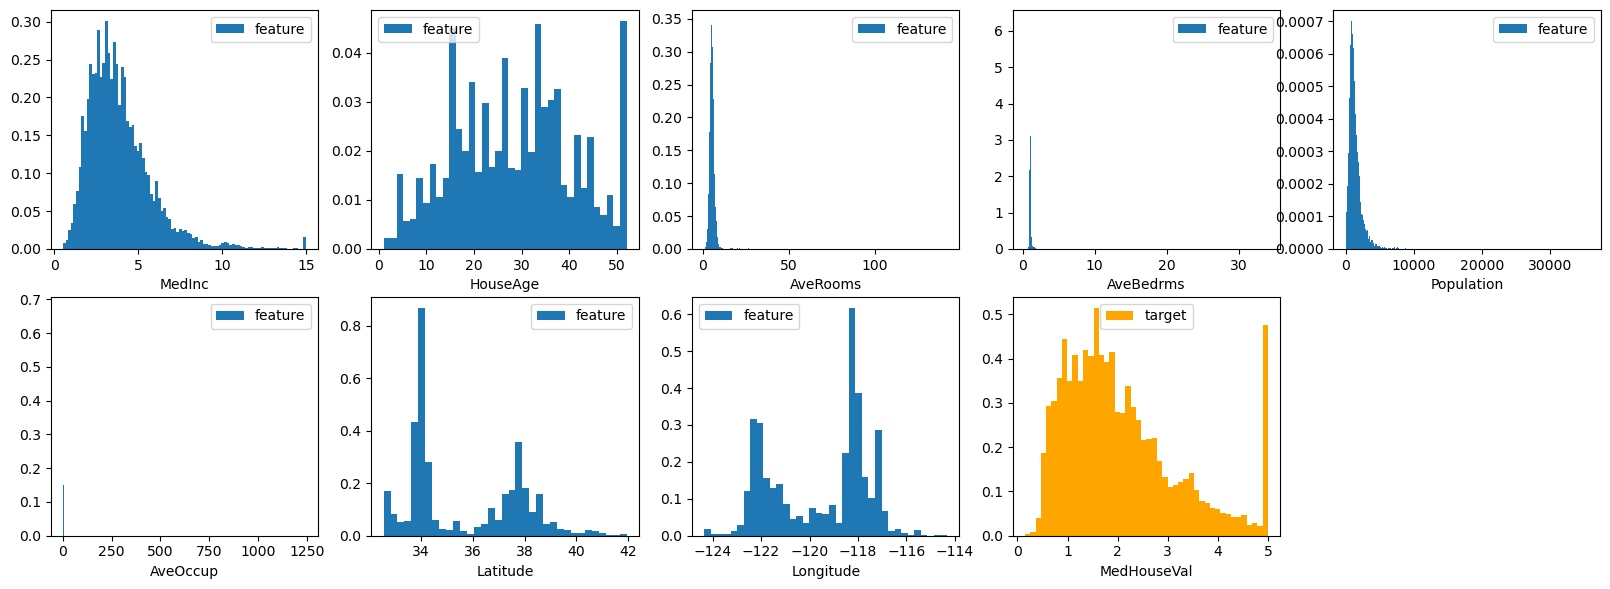

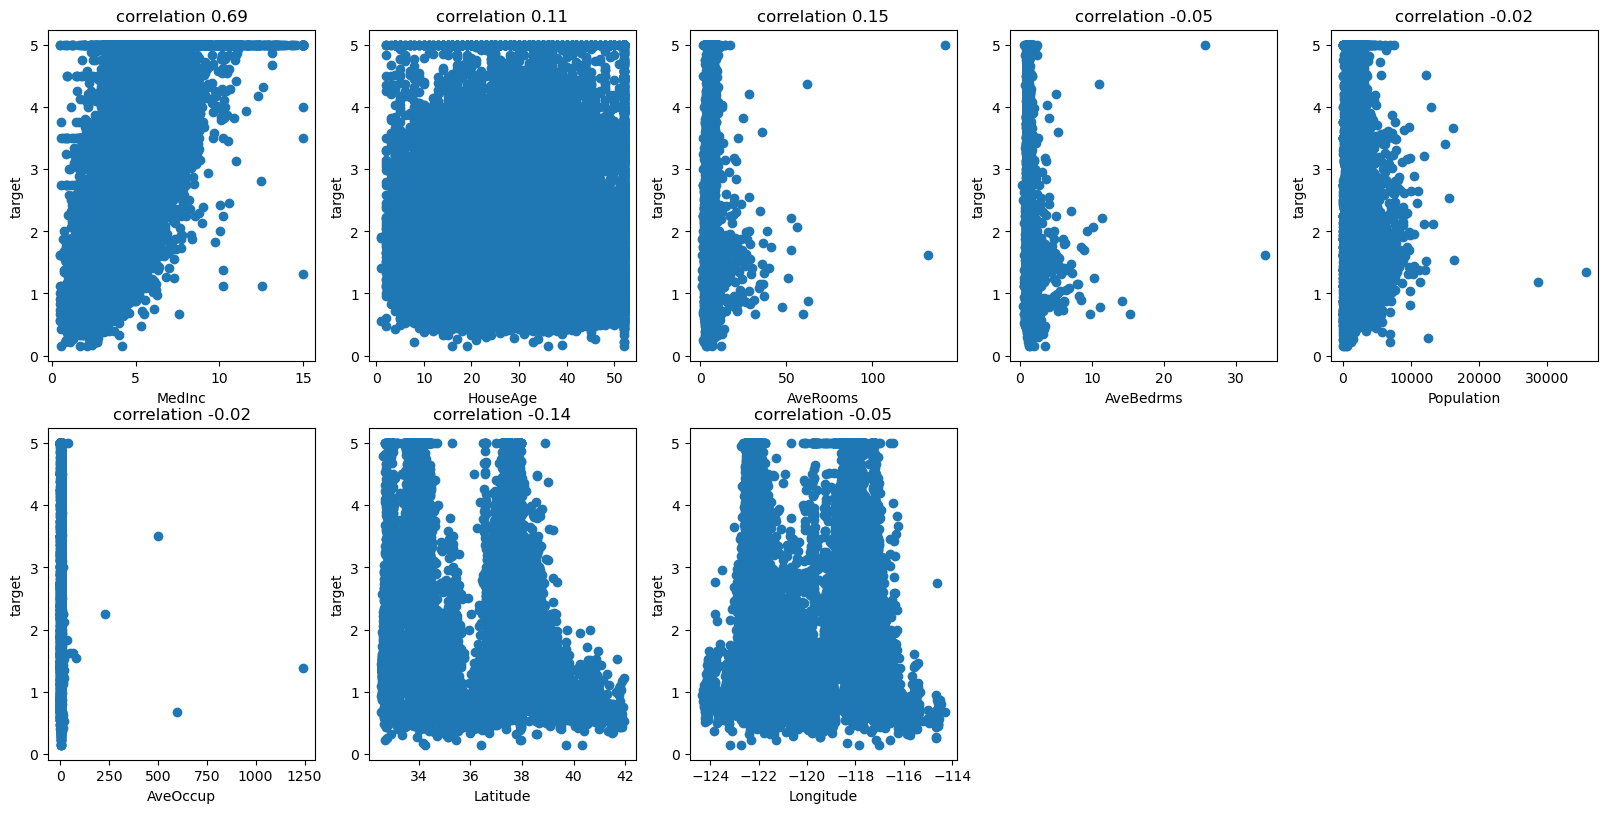

In [ ]:
# b) Show histograms
print("data features")
plt.figure(figsize=(20, 18))
for i in range(X.shape[1]+1):
    plt.subplot(5, 5, i+1)
    if (i==X.shape[1]):
        plt.hist(y,bins='auto', label='target', color='orange', density=1)
        plt.xlabel('%s' % housing.target_names[0])
    else:
        n, bins, patches = plt.hist(X[:,i], bins='auto', label='feature', density=1)
        plt.xlabel('%s' %housing.feature_names[i])
    #plt.hist(x_test[:,i], bins, alpha=0.5, label='Test', density=1)
    plt.legend(loc='best')

# c) Scatter plots
plt.figure(figsize=(20, 25))
for i in range(X.shape[1]):
    plt.subplot(5, 5, i+1)
    plt.scatter(X[:,i],y)
    #plt.hist(x_test[:,i], bins, alpha=0.5, label='Test', density=1)
    plt.xlabel('%s' %housing.feature_names[i])
    plt.ylabel("target")
    cor = np.corrcoef(X[:,i],y)[0,1]
    plt.title('correlation %.2f' % cor)

In [ ]:
def makeplots(y,ypred):
    plt.figure(figsize=(10,5))

    plt.subplot(1, 2, 1)
    plt.scatter(y,ypred)
    plt.xlabel('y true')
    plt.ylabel('y pred')
    xx=np.linspace(0,6,50)
    plt.plot(xx,xx,'k-')

    plt.subplot(1, 2, 2)
    mean = np.mean(y-ypred)
    std = np.std(y-ypred)
    n, bins, _ = plt.hist(y-ypred,bins='auto', label='mean = %.3f, std = %.3f' %(mean,std), density=1)
    plt.xlabel('y true - y pred')
    #_ = plt.hist(ypred,bins=bins, label='y pred', density=1)
    plt.legend()

# 3. Split data in train and test samples


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

print('Features: Train size: ',X_train.shape,'Test size: ',X_test.shape)
print('Target: Train size: ',y_train.shape,'Test size: ',y_test.shape)

Features: Train size:  (14448, 8) Test size:  (6192, 8)
Target: Train size:  (14448,) Test size:  (6192,)


# 4. Linear regression

Construct a predictive model using linear regression:

$$y_{pred} = w_0 + \sum_{i=1}^{N=13} w_i X_i$$

For this use the scikit-learn model described here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


Fitted weights: 
 [ 4.53053771e-01  1.01139824e-02 -1.30682277e-01  8.47640845e-01
 -3.48804147e-06 -3.35207458e-03 -4.23235312e-01 -4.37132608e-01]
Bias term: -37.36226610640842

Train sample: RMS = 0.724, R2 Score: 0.610

Test sample: RMS = 0.730, R2 Score: 0.591


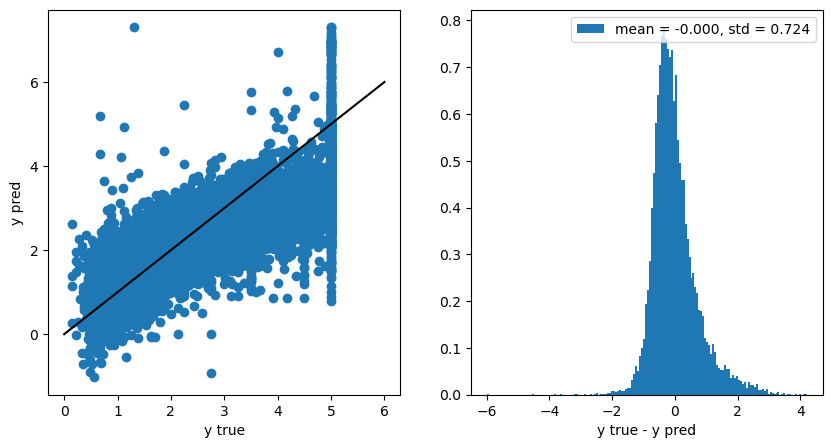

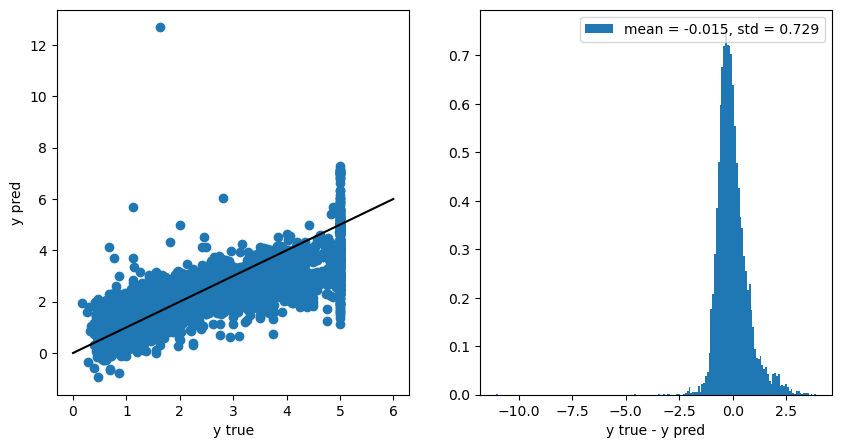

In [ ]:
# Fit of the model
model1 = LinearRegression()
reg = model1.fit(X_train, y_train)

# Get parameters
print('Fitted weights: \n',reg.coef_)
print('Bias term:',reg.intercept_)

# Train sample
y_train_pred = reg.predict(X_train) # Predicted targets

# plots
makeplots(y_train,y_train_pred)

# Quality of the fit
print('\nTrain sample: RMS = %.3f, R2 Score: %.3f'
      % (np.sqrt(mean_squared_error(y_train,y_train_pred)),reg.score(X_train, y_train)))

# Same for: Test sample
y_test_pred = reg.predict(X_test)

print('\nTest sample: RMS = %.3f, R2 Score: %.3f'
      % (np.sqrt(mean_squared_error(y_test,y_test_pred)),reg.score(X_test, y_test)))

makeplots(y_test,y_test_pred)


# 5. Ridge penalty (a.k.a L2 norm)


$$y_{pred} = w_0 + \sum_{i=1}^{N=13} w_i X_i + \lambda \sum_{i=0}^{N=13} w_i^2$$

See the scikit-learn implementation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html


Fitted weights: 
 [ 4.52845120e-01  1.01163013e-02 -1.30293421e-01  8.45437310e-01
 -3.48316349e-06 -3.35150502e-03 -4.23237465e-01 -4.37109000e-01]
Bias term: -37.358329358533275

Train sample: RMS = 0.724, R2 Score: 0.610

Test sample: RMS = 0.730, R2 Score: 0.591


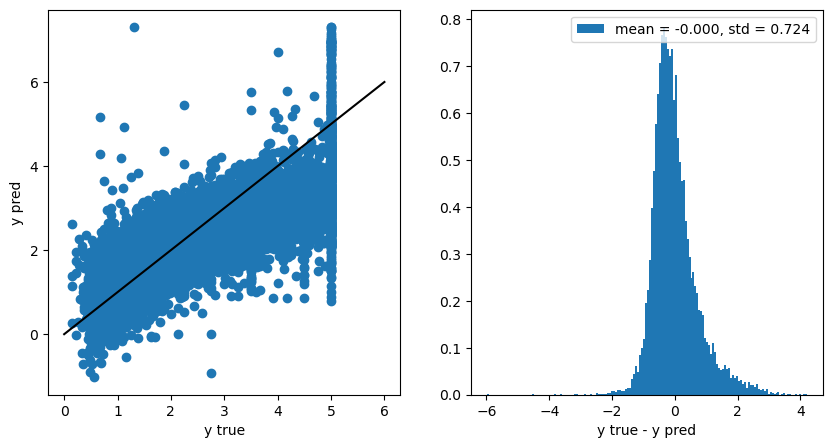

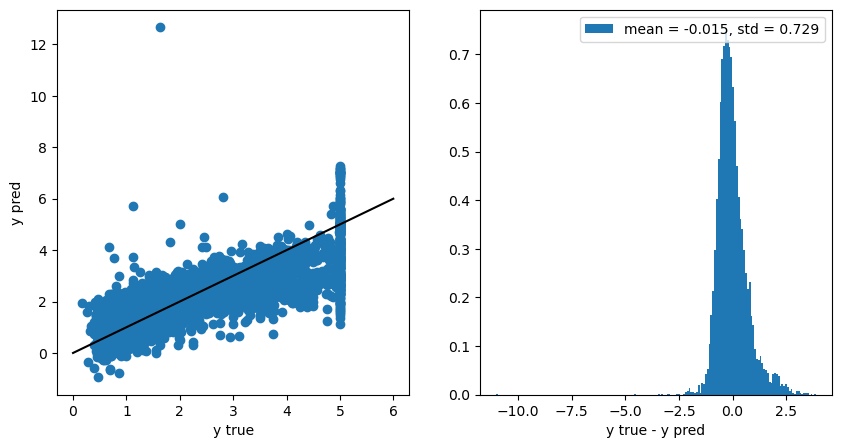

In [ ]:
# define model
model2 = Ridge(alpha=1) # Alpha sets the lambda (yes...) hyperparameter
reg = model2.fit(X_train, y_train)

# Get parameters
print('Fitted weights: \n',reg.coef_)
print('Bias term:',reg.intercept_)

# Train sample
y_train_pred = reg.predict(X_train) # Predicted targets

# plots
makeplots(y_train,y_train_pred)

# Quality of the fit
print('\nTrain sample: RMS = %.3f, R2 Score: %.3f'
      % (np.sqrt(mean_squared_error(y_train,y_train_pred)),reg.score(X_train, y_train)))

# Same for: Test sample
y_test_pred = reg.predict(X_test)

print('\nTest sample: RMS = %.3f, R2 Score: %.3f'
      % (np.sqrt(mean_squared_error(y_test,y_test_pred)),reg.score(X_test, y_test)))

makeplots(y_test,y_test_pred)


# Lasso (a.k.a L1 norm)

Fitted weights: 
 [ 3.92312504e-01  1.55686675e-02 -0.00000000e+00  0.00000000e+00
  1.45263182e-05 -3.06600750e-03 -1.16728543e-01 -1.01565593e-01]
Bias term: -7.886815122214068

Train sample: RMS = 0.783, R2 Score: 0.544

Test sample: RMS = 0.764, R2 Score: 0.551


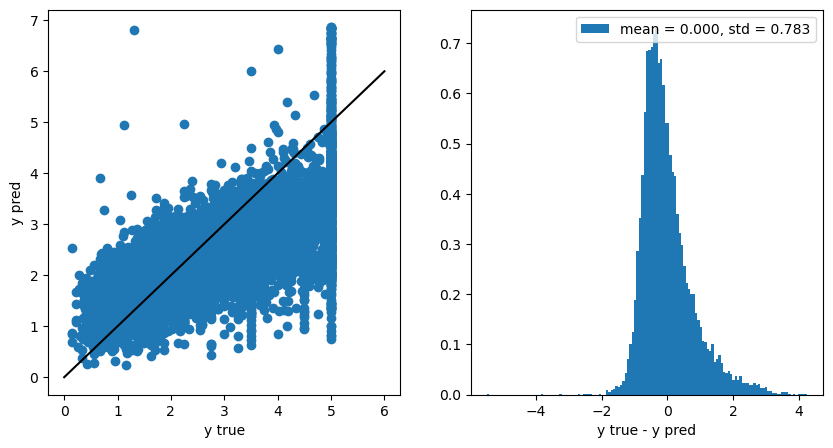

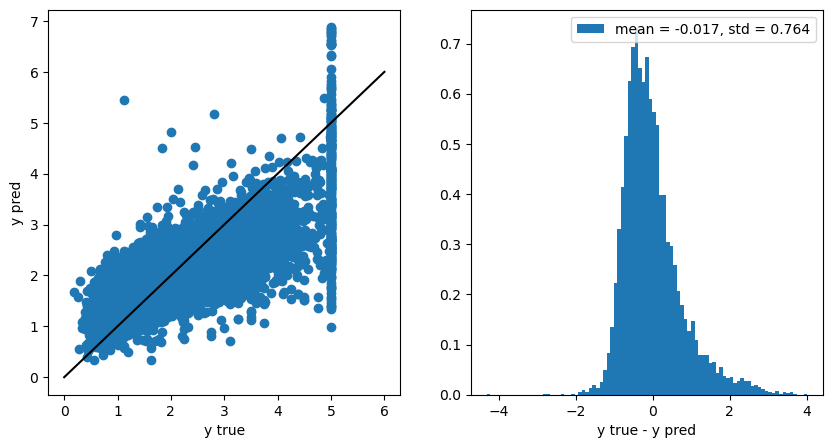

In [ ]:
# Fit of the model
model3 = Lasso(alpha=0.1)
reg = model3.fit(X_train, y_train)

# Get parameters
print('Fitted weights: \n',reg.coef_)
print('Bias term:',reg.intercept_)

# Train sample
y_train_pred = reg.predict(X_train) # Predicted targets

# plots
makeplots(y_train,y_train_pred)

# Quality of the fit
print('\nTrain sample: RMS = %.3f, R2 Score: %.3f'
      % (np.sqrt(mean_squared_error(y_train,y_train_pred)),reg.score(X_train, y_train)))

# Same for: Test sample
y_test_pred = reg.predict(X_test)

print('\nTest sample: RMS = %.3f, R2 Score: %.3f'
      % (np.sqrt(mean_squared_error(y_test,y_test_pred)),reg.score(X_test, y_test)))

makeplots(y_test,y_test_pred)

## 6. Estimating model performance: Cross-validation


In [ ]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=False)
scores = cross_val_score(model1, X, y, scoring='neg_mean_squared_error', cv=cv)
scores = np.absolute(scores)
print('Mean RMS: %.2f +- %.2f' % (np.mean(np.sqrt(scores)),np.std(np.sqrt(scores))))

Mean RMS: 0.75 +- 0.04


## 7. Optional: Improve the model ?

A much better result can be achieved by pre-processing the data and adding some non-linerity to the model with using a neural network

a) First, standardize all features by removing the mean and scaling to unit variance using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

b) Try to implement a neural network with [Multi-layer Perceptron regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor). For example, two hidden layers with 100 and 50 neurons each and relu activation function does a decent job.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit (get min and max) and transform x_train
X_train = scaler.fit_transform(X_train)

# transform x_test (using scale parameters of x_train)
X_test = scaler.transform(X_test)


Train sample: RMS = 0.468, R2 Score: 0.837

Test sample: RMS = 0.538, R2 Score: 0.777


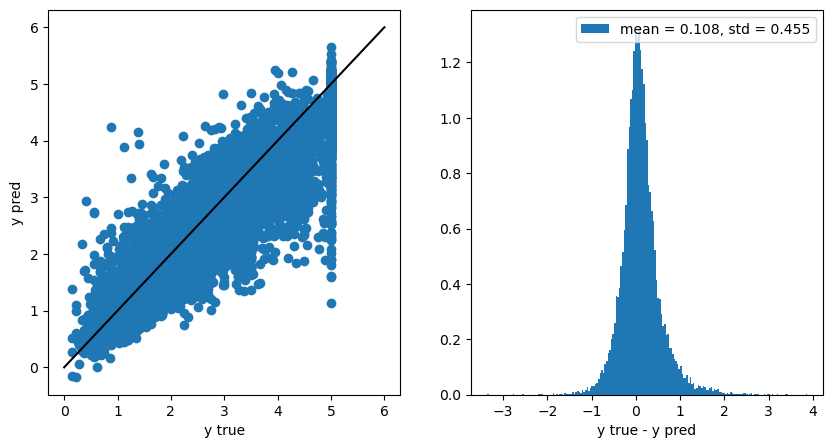

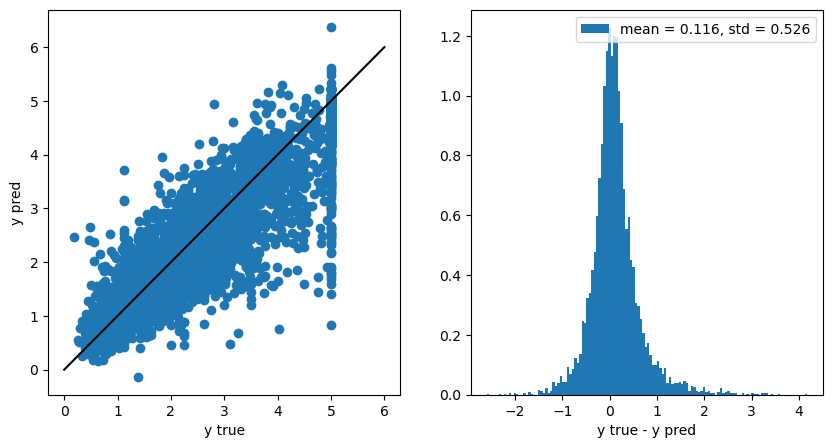

In [ ]:
from sklearn.neural_network import MLPRegressor
model4 = MLPRegressor(hidden_layer_sizes=(100,50),activation='relu',max_iter=400)

# Fit of the model
reg = model4.fit(X_train, y_train)

# Train sample
y_train_pred = reg.predict(X_train) # Predicted targets

# plots
makeplots(y_train,y_train_pred)

# Quality of the fit
print('\nTrain sample: RMS = %.3f, R2 Score: %.3f'
      % (np.sqrt(mean_squared_error(y_train,y_train_pred)),reg.score(X_train, y_train)))

# Same for: Test sample
y_test_pred = reg.predict(X_test)

print('\nTest sample: RMS = %.3f, R2 Score: %.3f'
      % (np.sqrt(mean_squared_error(y_test,y_test_pred)),reg.score(X_test, y_test)))

makeplots(y_test,y_test_pred)

In [ ]:
# Print parameters
print('Fitted weights: \n',reg.coefs_)
print('Bias term:',reg.intercepts_)

Fitted weights: 
 [array([[ 5.27181647e-02,  1.64902356e-01, -2.49992394e-02,
        -9.50559652e-02,  2.00363165e-01,  1.62107160e-02,
        -1.47768747e-01,  1.37019664e-01,  3.58427155e-02,
        -1.81127050e-02,  2.46310949e-01,  1.99766534e-01,
         2.43362368e-01, -1.92477455e-01,  1.80736481e-01,
         8.99886695e-02, -1.34310338e-01, -1.17305895e-01,
         1.90076858e-01,  2.32303433e-01, -2.54914959e-02,
         3.27060532e-02,  6.14733332e-02,  2.40340692e-02,
         1.05242359e-01,  1.97143687e-01,  3.70970574e-01,
        -1.13219491e-01, -2.92682580e-02,  1.00698830e-01,
         9.04807194e-02,  5.02050632e-02,  2.02162522e-01,
         7.29539939e-02,  1.75559644e-02, -9.59316215e-03,
         6.54768563e-02,  1.20605487e-01,  9.80086705e-02,
        -9.13428261e-03, -1.64240819e-02,  1.84562559e-01,
         2.76789387e-01, -2.42986878e-01,  2.71311603e-02,
        -1.21558089e-03,  3.82139442e-01,  2.83733749e-01,
         8.49325989e-02, -4.25823347e